
<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the course. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [1]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [2]:
x = np.genfromtxt('accel.dat')
# sampling frequency of the signal is 500 Hz
fs = 40
# generate correponding time vector
t = np.arange(len(x))/fs


 <br>
    The signal is an acceleration signal measured at the wrist.<br>
    The signal records the acceleration during the hand washing protocol in an<br>
    hospital. The goal is to detect the hand washing sequence.<br>
    The hand washing protocol produced rhythmical movements.<br>
    The protocol is known to take place between 20 and 30 seconds.<br>



 <br>
    Plot time signal.<br>
    Q: Comment the figure.<br>
   
   <b>Answer:</b>
    Between 20 to 30 seconds, there is an increase in amplitude and oscillations, which corresponds to the hand washing protocol. This pattern reflects the repetitive hand movements typical of the handwashing protocol. The peak around 28-30 seconds likely corresponds to a faster or stronger motion during the protocol. Outside of the 20-30 second interval, the signal has smaller irregular amplitudes, likely representing normal wrist movement as well as noise. This clear change in signal characteristics helps identify the handwashing activity.


Compute the FFT of the signal

In [3]:
x_fft = np.fft.fft(x)
# Determine the frequency scale
f_fft = np.arange(len(x_fft))/len(x_fft)*fs

plot the signal

Text(0.5, 1.0, 'acceleration signal signal')

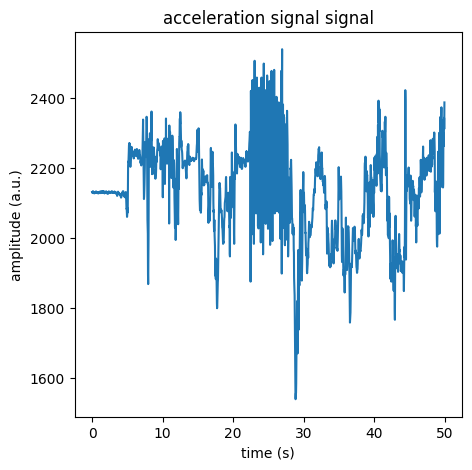

In [4]:
py.figure(1, figsize=[5,5])
py.clf()
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('acceleration signal signal')


 <br>
    High pass the signal.<br>
    Q: Comment the figure.<br>


high-pass filter with cutoff frequency of 0.5 Hz

In [5]:
b, a = sp.butter(4, 0.5/fs*2, btype='high')
# zero-phase filtering of the signal
x_hp = sp.filtfilt(b, a, x)

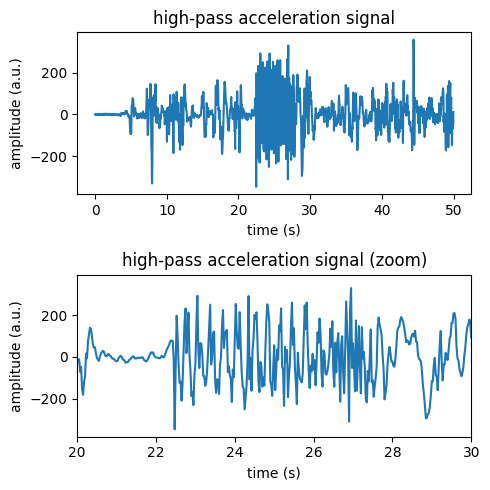

In [11]:
py.figure(2, figsize=[5,5])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_hp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('high-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_hp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('high-pass acceleration signal (zoom)')
py.xlim(20, 30)
py.tight_layout()

After applying a high-pass filter, the signal removes slow, baseline fluctuations and highlights rapid changes in acceleration. This makes the rhythmic handwashing movements more visible, especially in the 20–30 second interval. The filter helps isolate the relevant activity by suppressing low-frequency noise and drift, improving the clarity of the handwashing sequence in the signal.


<br>
    Band pass the signal between 2.4 and 3.2 Hz.<br>
    Q: Based on previous figure, comment the selection of the frequencies.<br>
    Q: Why zero phase filter (filtfilt) is used?<br>


Analogic limit of the passband frequency

In [7]:
f_pass = np.array([2.4, 3.2])
# Analogic limit of the stopband frequency
f_stop = np.array([0, 5])
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn, btype='band')
# Filter the signal
x_bp = sp.filtfilt(b ,a, x_hp)

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_filter_design.py:3868: RuntimeWarning: divide by zero encountered in divide
  nat = ((stopb ** 2 - passb[0] * passb[1]) /


(20.0, 30.0)

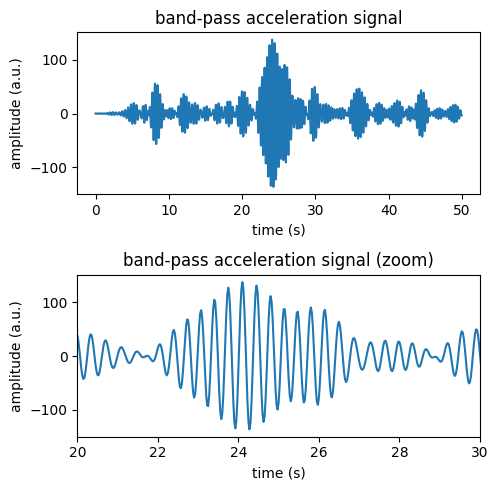

In [8]:
py.figure(3, figsize=[5,5])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_bp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('band-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_bp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('band-pass acceleration signal (zoom)')
py.tight_layout()
py.xlim(20, 30)

**Q: Based on previous figure, comment the selection of the frequencies.**

The selected band-pass frequencies (2.4–3.2 Hz) correspond to the dominant frequency range of the rhythmic handwashing movements observed in the acceleration signal between 20 and 30 seconds. This range isolates the periodic activity associated with handwashing, filtering out both slower baseline fluctuations and higher-frequency noise, thus focusing on the relevant motion.

**Q: Why zero phase filter (filtfilt) is used?**

The zero-phase filter (`filtfilt`) is used to avoid phase distortion in the filtered signal. It applies the filter forward and backward, ensuring that the timing and shape of the detected handwashing events remain accurate and are not shifted or distorted by the filtering process.


<br>
    Low-pass filter of the power of the band-pass signal.<br>
    Q: Why use the power of the acceleration signal?<br>
    Q: How the detection of hand washing is obtained?<br>


Analogic limit of the passband frequency

In [9]:
f_pass = 0.4
# Analogic limit of the stopband frequency
f_stop = 0.8
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn)
# Filter the signal
x_pow = sp.filtfilt(b ,a, x_bp**2)
# detection
det = x_pow > 2000

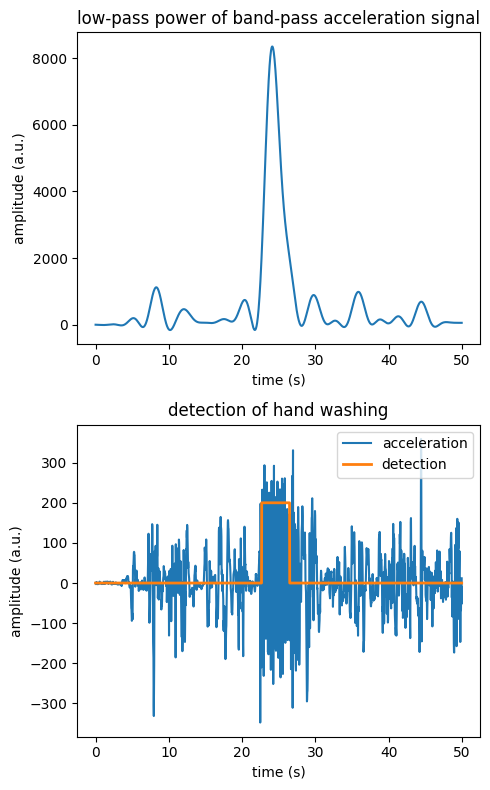

In [10]:
py.figure(4, figsize=[5,8])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_pow)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('low-pass power of band-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_hp, label='acceleration')
py.plot(t, det*200, linewidth=2, label='detection')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('detection of hand washing')
py.tight_layout()
py.legend(loc='upper right')

**Q: Why use the power of the acceleration signal?**

The power of the acceleration signal (i.e., squaring the band-pass filtered signal) emphasizes periods of strong rhythmic activity. This helps to distinguish handwashing movements from background noise or less intense motions, making detection more robust. Additionally, squaring the acceleration signal removes the sign dependency. All of the accelerations become positive, therefore it is possible to see what sections have the highest magnitude.

**Q: How is the detection of hand washing obtained?**

Detection is achieved by low-pass filtering the power of the band-pass signal to smooth out rapid fluctuations, then applying a threshold. When the smoothed power exceeds this threshold, it indicates the presence of handwashing activity.